In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load data
telco_df = pd.read_csv('/content/telco_churn_data.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# since customerID is not useful. lets drop it
telco_df.drop('customerID',axis=1,inplace=True)

In [4]:
# lets check the dtypes
telco_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# as we can see MonthlyCharges is in dtype but actually contains numeric values
telco_df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
# lets convert it into numeric
#pd.to_numeric(telco_df.TotalCharges)

In [7]:
# as we can see there is some spaces(nulls) in these column. so, we need to remove them first.
pd.to_numeric(telco_df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
telco_df.TotalCharges.isnull().sum()

0

In [9]:
telco_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# lets change it to numeric 
#telco_df.TotalCharges=pd.to_numeric(telco_df.TotalCharges)

In [11]:
# as we can see row 488 contains space
telco_df.iloc[488].TotalCharges

' '

In [12]:
# lets remove rows which contains spaces in TotalCharges
# lets first check the shape of our df
telco_df.shape

(7043, 20)

In [13]:
# lets remove rows where TotalCharges are spaces
telco_df=telco_df[telco_df.TotalCharges!=' ']
telco_df.shape

(7032, 20)

In [14]:
# now we can convert TotalCharges column to numeric
telco_df.TotalCharges=pd.to_numeric(telco_df.TotalCharges)
telco_df.TotalCharges.dtypes

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


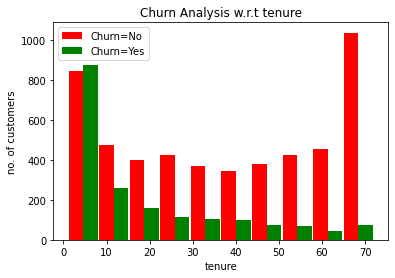

In [15]:
# lets see the chances of churn w.r.t tenure by plotting
# u can also plot other features w.r.t churn(target)
tenure_churn_yes=telco_df[telco_df.Churn=='Yes'].tenure
tenure_churn_no=telco_df[telco_df.Churn=='No'].tenure
plt.xlabel('tenure')
plt.ylabel('no. of customers')
plt.title('Churn Analysis w.r.t tenure')
plt.hist([tenure_churn_no,tenure_churn_yes],rwidth=0.95,color=['red','green'],label=['Churn=No','Churn=Yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


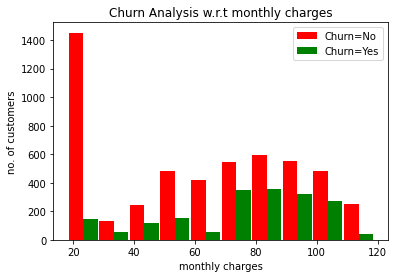

In [16]:
mc_churn_yes=telco_df[telco_df.Churn=='Yes'].MonthlyCharges
mc_churn_no=telco_df[telco_df.Churn=='No'].MonthlyCharges
plt.xlabel('monthly charges')
plt.ylabel('no. of customers')
plt.title('Churn Analysis w.r.t monthly charges')
plt.hist([mc_churn_no,mc_churn_yes],rwidth=0.95,color=['red','green'],label=['Churn=No','Churn=Yes'])
plt.legend()

In [17]:
# lets define a function to cheque unique values in every column
# so that this function can be used multiple times for any df
def all_col_unique(df):
  for col in telco_df:
    print(f'{col} : {telco_df[col].unique()}')

In [18]:
all_col_unique(telco_df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [19]:
# since, we need to encode object dtypes
# lets create a function to cheque unique values of only object dtype columns
def object_col_unique(df):
  for col in df:
    if df[col].dtypes=='object':
      print(f'{col} : {df[col].unique()}')

In [20]:
object_col_unique(telco_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
# Some of the columns have no internet service or no phone service, that can be replaced with a simple No
telco_df.replace('No internet service','No',inplace=True)
telco_df.replace('No phone service','No',inplace=True)

In [22]:
object_col_unique(telco_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
# lets replace yes , no with 1's and 0's
# so lets extract a list of columns with yes or no to replace them
# lets first see the columns list
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
# yes_no_columns list
yes_no_cols=['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn']
for col in yes_no_cols:
  telco_df[col].replace('Yes',1,inplace=True)
  telco_df[col].replace('No',0,inplace=True)

In [25]:
all_col_unique(telco_df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [26]:
telco_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
# lets encode gender column to 1 and 0
telco_df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
telco_df.gender.values

array([1, 0, 0, ..., 1, 0, 0])

In [29]:
# lets apply one hot encoding to object columns with more than two categorical values
telco_df1=pd.get_dummies(data=telco_df,columns=['InternetService','Contract','PaymentMethod'])
telco_df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [30]:
telco_df1.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [31]:
telco_df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
telco_df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [33]:
for col in telco_df1:
  print(f'{col} : {telco_df1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [34]:
# since our data is processed neatly
# lets perform train test split to apply ANN
X = telco_df1.drop('Churn',axis=1)
y = telco_df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


In [36]:
# lets apply standardization 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


In [38]:
# lets import libraries and build ANN model
import tensorflow as tf
from tensorflow import keras

In [39]:
model=keras.Sequential([
                        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.77470, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.77470 to 0.78607, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.78607 to 0.78820, saving model to best_model.h5

Epoch 00004: val_accuracy did not improve from 0.78820

Epoch 00005: val_accuracy improved from 0.78820 to 0.79247, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.79247 to 0.79673, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.79673 to 0.79815, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.79815

Epoch 00009: val_accuracy did not improve from 0.79815

Epoch 00010: val_accuracy improved from 0.79815 to 0.79957, saving model to best_model.h5

Epoch 00011: val_accuracy did not improve from 0.79957

Epoch 00012: val_accuracy did not improve from 0.79957

Epoch 00013: val_accuracy did not improve from 0.79957

Epoch 00014: val_accuracy did

In [41]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.7541


[0.6366485357284546, 0.7540867328643799]

In [42]:
import joblib
joblib.dump(sc,'scaler.pkl')

['scaler.pkl']

In [43]:
# loading model
sc = joblib.load('scaler.pkl')

In [ ]:
model = load_model('best_model.h5')

In [46]:
# expected 0 but got 1
prediction=model.predict_classes(sc.transform([[1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0]]))
prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [64]:
telco_df1.iloc[[4]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.7,151.65,1,0,1,0,1,0,0,0,0,1,0


In [63]:
# testing index 0
# expected 0 and got 1
prediction=model.predict_classes(sc.transform([[1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0]]))
prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [62]:
# testing index 1
# expected 0 and got 0
prediction=model.predict_classes(sc.transform([[0,	0,	0	,0,	34,	1	,0,	1	,0,	1	,0,	0	,0,	0,	56.95,	1889.5,1	,0	,0	,0,	1,	0,	0	,0,	0,	1]]))
prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

In [65]:
# testing index 4
# expected 1 and got 1
prediction=model.predict_classes(sc.transform([[1,	0,	0	,0,	2	,1,	0	,0,	0	,0,	0,	0,	0,	1	,70.7,	151.65	,	0,	1,	0,	1,	0,	0,	0,	0,	1,	0]]))
prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [66]:
str_pred=prediction.tolist()
str_pred

[[1]]

In [68]:
str_pred==[[1]]

True